# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rasendra Akbar Satyatama]
- **Email:** [mc004d5y1124@student.devacademy.id]
- **ID Dicoding:** [MC004D5Y1124]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan musim dan cuaca?
- Pada hari apa penyewaan sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv("data/day.csv")
hours_df = pd.read_csv("data/hour.csv")

In [3]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print(days_df.info())
print(hours_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [6]:
days_df = days_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hum':'humidity',
                       'cnt':'count'})

hours_df = hours_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [7]:
kategorik_hour = ['season' , 'year','month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']
kategorik_day = ['season' , 'year','month' , 'holiday' , 'weekday' , 'workingday' , 'weather']

for col in kategorik_day:
    days_df[col] = days_df[col].astype('category')
    
for col in kategorik_hour:
    hours_df[col] = hours_df[col].astype('category')

In [8]:
print(days_df.info())
print(hours_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   year        731 non-null    category
 4   month       731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  humidity    731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  count       731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 58.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 en

**Insight:** 
- Beberapa kolom diubah menjadi tipe data kategori untuk efisiensi dan kemudahan analisis.  
- Kolom kategori pada **days_df** mencakup musim, tahun, bulan, hari libur, hari kerja, dan cuaca.  
- Kolom kategori pada **hours_df** sama dengan days_df, tetapi dengan tambahan jam.
- Days_df dan hours_df tidak perlu digabungkan karena memiliki tingkat granularitas yang berbeda (harian vs. per jam), dan analisis akan difokuskan pada pola harian.
- Fokus analisis selanjutnya akan menggunakan days_df untuk menjawab pertanyaan bisnis yang telah ditentukan.

### Assessing Data

In [9]:
print(days_df.duplicated().sum())
print(hours_df.duplicated().sum())

0
0


In [10]:
print(days_df.isnull().sum())
print(hours_df.isnull().sum())

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [11]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Hitung nilai yang berada di luar batas bawah dan atas
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

In [12]:
for col in days_df.columns:
    if pd.api.types.is_numeric_dtype(days_df[col]):
        print(f"{col} - Jumlah outlier: {count_outliers_iqr(days_df[col])}")
        

instant - Jumlah outlier: 0
temp - Jumlah outlier: 0
atemp - Jumlah outlier: 0
humidity - Jumlah outlier: 2
windspeed - Jumlah outlier: 13
casual - Jumlah outlier: 44
registered - Jumlah outlier: 0
count - Jumlah outlier: 0


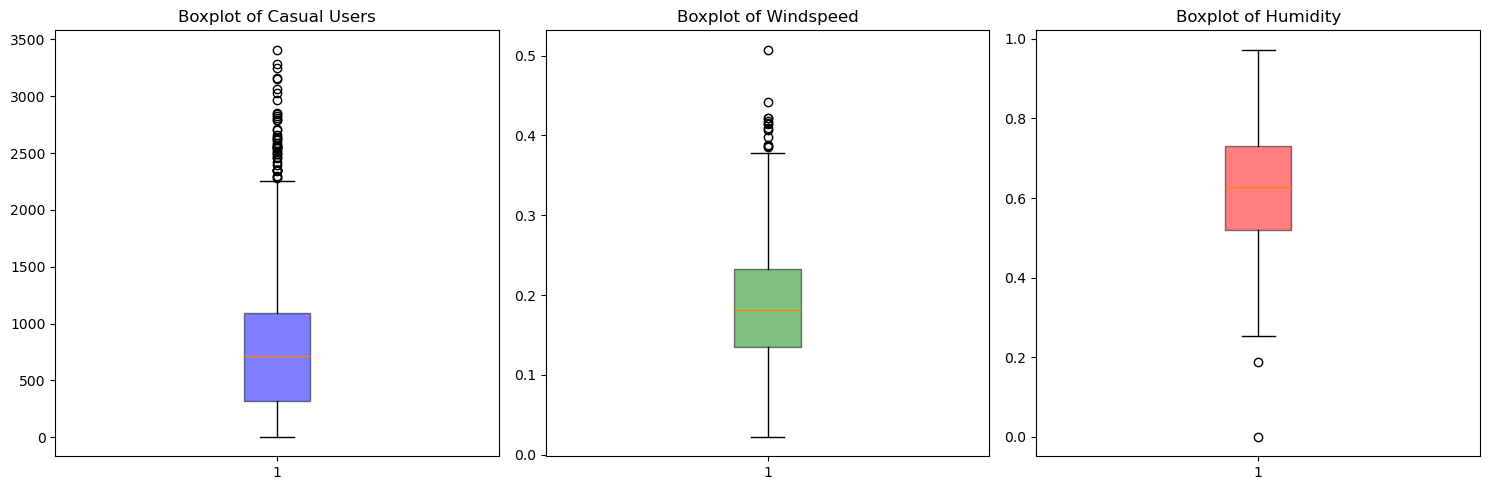

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(days_df['casual'], vert=True, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.5))
axes[0].set_title('Boxplot of Casual Users')

axes[1].boxplot(days_df['windspeed'], vert=True, patch_artist=True, boxprops=dict(facecolor='green', alpha=0.5))
axes[1].set_title('Boxplot of Windspeed')

axes[2].boxplot(days_df['humidity'], vert=True, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.5))
axes[2].set_title('Boxplot of Humidity')

plt.tight_layout()
plt.show()

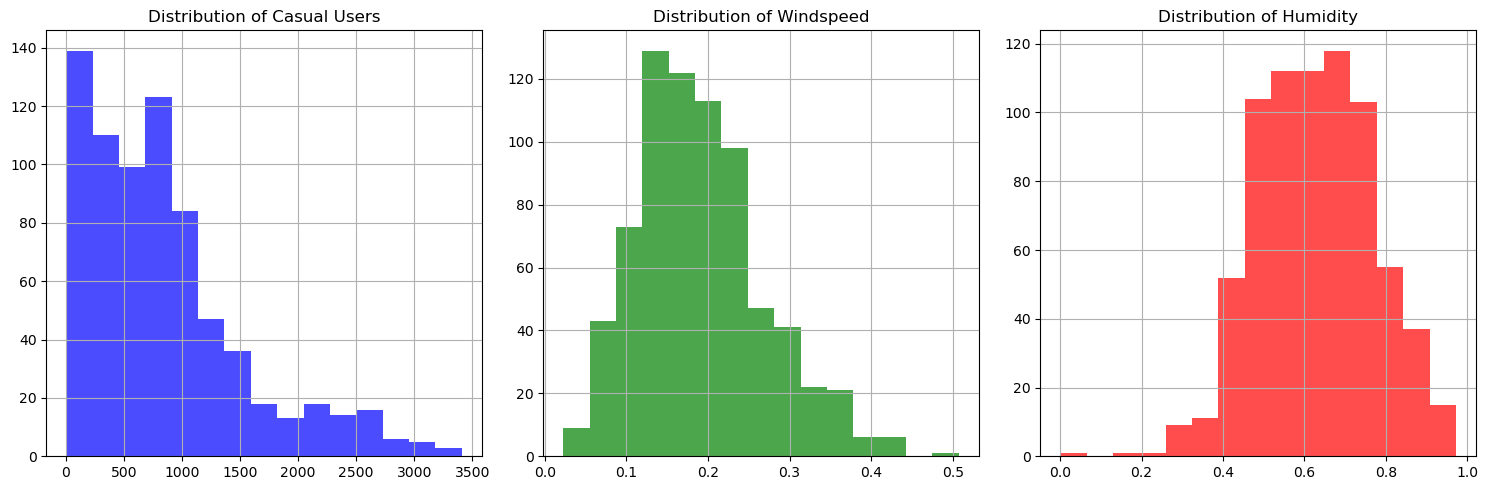

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

days_df['casual'].hist(bins=15, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Distribution of Casual Users')

days_df['windspeed'].hist(bins=15, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Distribution of Windspeed')

days_df['humidity'].hist(bins=15, ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Distribution of Humidity')

plt.tight_layout()
plt.show()

**Insight:**
- Tidak ada missing value atau duplikasi dalam dataset.
- Casual: Memiliki 44 outlier → Imputasi menggunakan batas atas (upper bound) agar tetap dalam rentang data wajar.
- Windspeed: Memiliki 13 outlier → Imputasi menggunakan batas atas (upper bound) berdasarkan boxplot.
- Humidity: Memiliki 2 outlier → Imputasi menggunakan batas bawah (lower bound) karena berdasarkan histogram terlihat pada sumbu ke 0 - 0.2 terdapat nilai.
- Variabel lain (instant, temp, atemp, registered, count) tidak memiliki outlier, sehingga tidak perlu imputasi khusus.

### Cleaning Data

In [15]:
Q1 = days_df[['casual', 'windspeed', 'humidity']].quantile(0.25)
Q3 = days_df[['casual', 'windspeed', 'humidity']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in ['casual', 'windspeed', 'humidity']:
    days_df[col] = days_df[col].mask(days_df[col] > upper_bound[col], upper_bound[col])
    days_df[col] = days_df[col].mask(days_df[col] < lower_bound[col], lower_bound[col])

In [16]:
for col in days_df.columns:
    if pd.api.types.is_numeric_dtype(days_df[col]):
        print(f"{col} - Jumlah outlier: {count_outliers_iqr(days_df[col])}")

instant - Jumlah outlier: 0
temp - Jumlah outlier: 0
atemp - Jumlah outlier: 0
humidity - Jumlah outlier: 0
windspeed - Jumlah outlier: 0
casual - Jumlah outlier: 0
registered - Jumlah outlier: 0
count - Jumlah outlier: 0


**Insight:**
- Casual: Tidak ada outlier setelah imputasi menggunakan batas atas.
- Windspeed: Tidak ada outlier setelah imputasi menggunakan batas atas.
- Humidity: Tidak ada outlier setelah imputasi menggunakan batas bawah.

## Exploratory Data Analysis (EDA)

### Descriptive Statistics Summary

,instant,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.628197,0.189846,824.388509,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.141320,0.075644,623.642956,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000



season unique values: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

year unique values: [0, 1]
Categories (2, int64): [0, 1]

month unique values: [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

holiday unique values: [0, 1]
Categories (2, int64): [0, 1]

weekday unique values: [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

workingday unique values: [0, 1]
Categories (2, int64): [0, 1]

weather unique values: [2, 1, 3]
Categories (3, int64): [1, 2, 3]


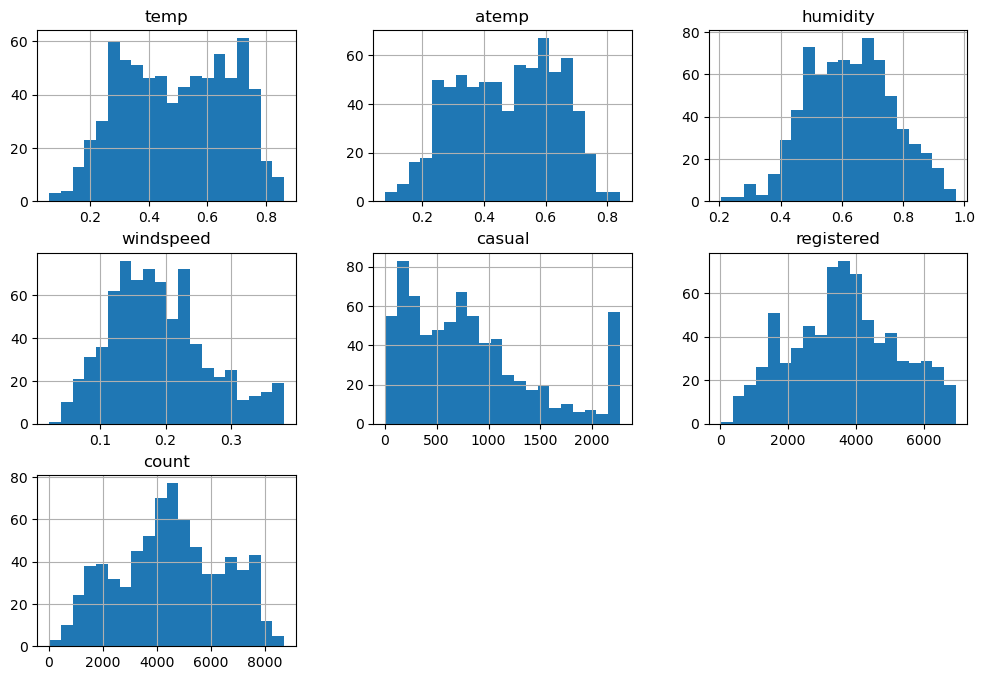

In [17]:
display(days_df.describe())

categorical_cols = ["season", "year", "month", "holiday", "weekday", "workingday", "weather"]
for col in categorical_cols:
    print(f"\n{col} unique values: {days_df[col].unique()}")

numerical_cols = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
days_df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.show()

In [18]:
# Mapping nilai kategori
weekday_map = {0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 
               4: "Jumat", 5: "Sabtu", 6: "Minggu"}
month_map = {1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
             5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
             9: "September", 10: "Oktober", 11: "November", 12: "Desember"}
year_map = {0: 2011, 1: 2012}
weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow/Rain"
}
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

weekday_counts = days_df.groupby("weekday")["count"].sum().reset_index()
weekday_counts["weekday"] = weekday_counts["weekday"].map(weekday_map)

monthly_counts = days_df.groupby("month")["count"].sum().reset_index()
monthly_counts["month"] = monthly_counts["month"].map(month_map)

yearly_counts = days_df.groupby("year")["count"].sum().reset_index()
yearly_counts["year"] = yearly_counts["year"].map(year_map)

weather_counts = days_df.groupby("weather")["count"].sum().reset_index()
weather_counts["weather"] = weather_counts["weather"].map(weather_map)

season_counts = days_df.groupby("season")["count"].sum().reset_index()
season_counts["season"] = season_counts["season"].map(season_map)

print("Total Peminjaman per Hari dalam Seminggu:\n", weekday_counts)
print("\nTotal Peminjaman Bulanan:\n", monthly_counts)
print("\nTotal Peminjaman Tahunan:\n", yearly_counts)
print("\nTotal Peminjaman Berdasarkan Cuaca:\n", weather_counts)
print("\nTotal Peminjaman Berdasarkan Musim:\n", season_counts)


Total Peminjaman per Hari dalam Seminggu:
   weekday   count
0   Senin  444027
1  Selasa  455503
2    Rabu  469109
3   Kamis  473048
4   Jumat  485395
5   Sabtu  487790
6  Minggu  477807

Total Peminjaman Bulanan:
         month   count
0     Januari  134933
1    Februari  151352
2       Maret  228920
3       April  269094
4         Mei  331686
5        Juni  346342
6        Juli  344948
7     Agustus  351194
8   September  345991
9     Oktober  322352
10   November  254831
11   Desember  211036

Total Peminjaman Tahunan:
    year    count
0  2011  1243103
1  2012  2049576

Total Peminjaman Berdasarkan Cuaca:
            weather    count
0            Clear  2257952
1             Mist   996858
2  Light Snow/Rain    37869

Total Peminjaman Berdasarkan Musim:
    season    count
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613


C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3785817144.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = days_df.groupby("weekday")["count"].sum().reset_index()
C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3785817144.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = days_df.groupby("month")["count"].sum().reset_index()
C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3785817144.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

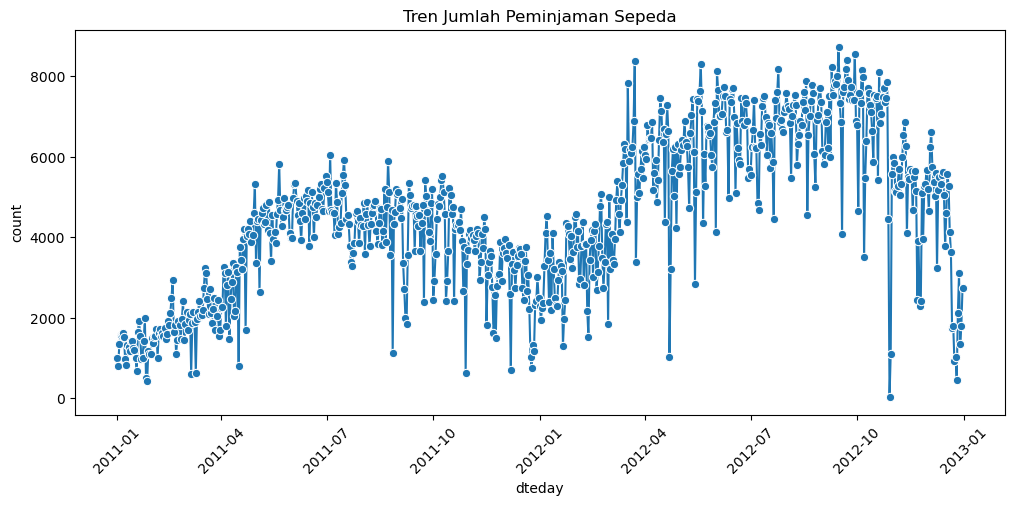

In [19]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"])

plt.figure(figsize=(12, 5))
sns.lineplot(x=days_df["dteday"], y=days_df["count"], marker='o')
plt.xticks(rotation=45)
plt.title("Tren Jumlah Peminjaman Sepeda")
plt.show()

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3048435693.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = days_df.groupby("month")["count"].sum().reset_index()


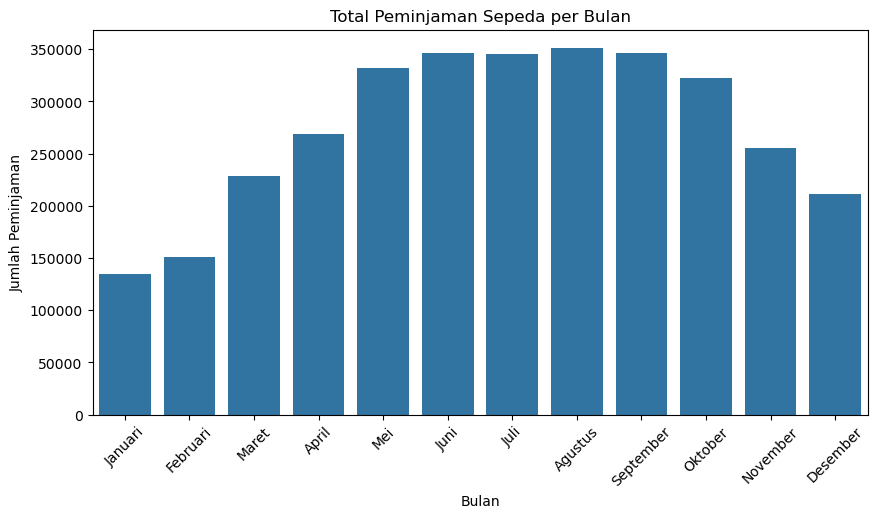

In [20]:
month_map = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
    5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
    9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

monthly_trend = days_df.groupby("month")["count"].sum().reset_index()

monthly_trend["month"] = monthly_trend["month"].map(month_map)

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_trend["month"], y=monthly_trend["count"])
plt.xticks(rotation=45)
plt.title("Total Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman")
plt.show()

In [21]:
month_map = {
    1: "Januari", 2: "Februari", 3: "Maret", 4: "April",
    5: "Mei", 6: "Juni", 7: "Juli", 8: "Agustus",
    9: "September", 10: "Oktober", 11: "November", 12: "Desember"
}

monthly_count = days_df.groupby("month")["count"].sum().reset_index()
monthly_count

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\1146236956.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_count = days_df.groupby("month")["count"].sum().reset_index()


,month,count
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\2025037516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_trend = days_df.groupby("year")["count"].sum().reset_index()


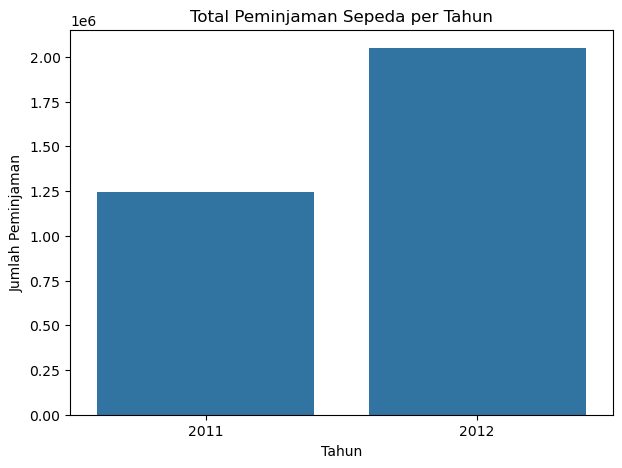

In [22]:
yearly_trend = days_df.groupby("year")["count"].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=yearly_trend["year"], y=yearly_trend["count"])
plt.xticks([0, 1], ["2011", "2012"])
plt.title("Total Peminjaman Sepeda per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peminjaman")
plt.show()

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\431539169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_avg = days_df.groupby("holiday")["count"].mean().reset_index()


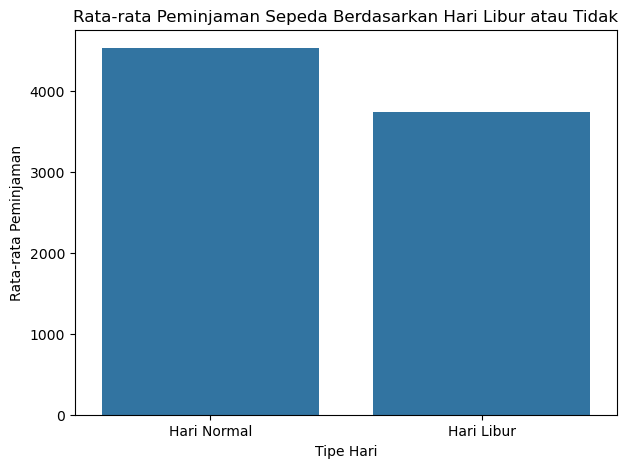

In [23]:
holiday_avg = days_df.groupby("holiday")["count"].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=holiday_avg["holiday"], y=holiday_avg["count"])
plt.xticks([0, 1], ["Hari Normal", "Hari Libur"])
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Hari Libur atau Tidak")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

In [24]:
print(holiday_avg)

  holiday        count
0       0  4527.104225
1       1  3735.000000


**Insight:**

_Pola Peminjaman Berdasarkan Hari dalam Seminggu_
- Peminjaman tertinggi terjadi pada Sabtu (487.790) dan Jumat (485.395).
- Hari kerja (Senin–Jumat) memiliki tren peminjaman yang stabil dan meningkat menjelang akhir pekan.
- Minggu memiliki peminjaman lebih sedikit dibanding Sabtu, kemungkinan karena orang lebih memilih untuk beristirahat.
>🔹 Insight: Bisa dilakukan promosi spesial pada akhir pekan untuk menarik lebih banyak pengguna.

_Tren Peminjaman Bulanan_
- Peminjaman sepeda meningkat dari Januari (134.933) hingga puncaknya di Agustus (351.194), lalu mulai turun menjelang akhir tahun.
- Bulan dengan peminjaman terendah adalah Januari dan Desember, kemungkinan karena cuaca lebih dingin.
>🔹 Insight: Kampanye promosi atau diskon bisa dilakukan di bulan-bulan dengan peminjaman rendah untuk meningkatkan pengguna.

_Perbandingan Peminjaman Tahun 2011 vs 2012_
- Peminjaman meningkat drastis dari 1.243.103 (2011) menjadi 2.049.576 (2012) → naik sekitar 65%.
>🔹 Insight: Program penyewaan sepeda semakin populer, dan ekspansi bisa dipertimbangkan untuk memenuhi permintaan yang meningkat.

_Pengaruh Cuaca terhadap Peminjaman_
- Cuaca cerah memiliki peminjaman tertinggi (2.257.952), sedangkan cuaca hujan/salju sangat rendah (37.869).
>🔹 Insight: Penyedia layanan bisa memberikan informasi cuaca kepada pelanggan dan menyediakan perlengkapan seperti jas hujan atau diskon saat cuaca buruk untuk meningkatkan pemakaian.

_Tren Berdasarkan Musim_
- Musim gugur (1.061.129) memiliki peminjaman tertinggi, diikuti musim panas (918.589).
- Musim semi (471.348) memiliki peminjaman terendah, kemungkinan karena suhu masih terlalu dingin untuk aktivitas outdoor.
>🔹 Insight: Kampanye promosi bisa lebih agresif di musim semi untuk meningkatkan jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan musim dan cuaca?

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3829217391.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = days_df.groupby("season")["count"].sum().rename(index=season_labels)
C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3829217391.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = days_df.groupby("weather")["count"].sum().rename(index=weather_labels)
C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3829217391.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

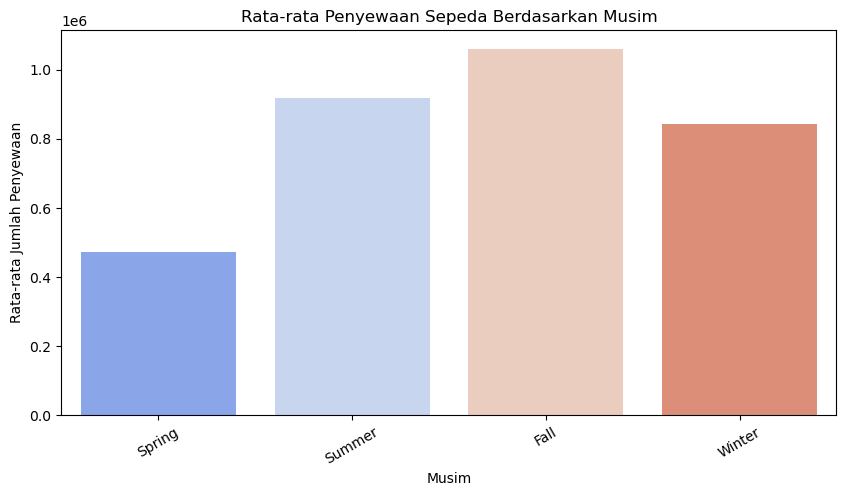

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\3829217391.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")


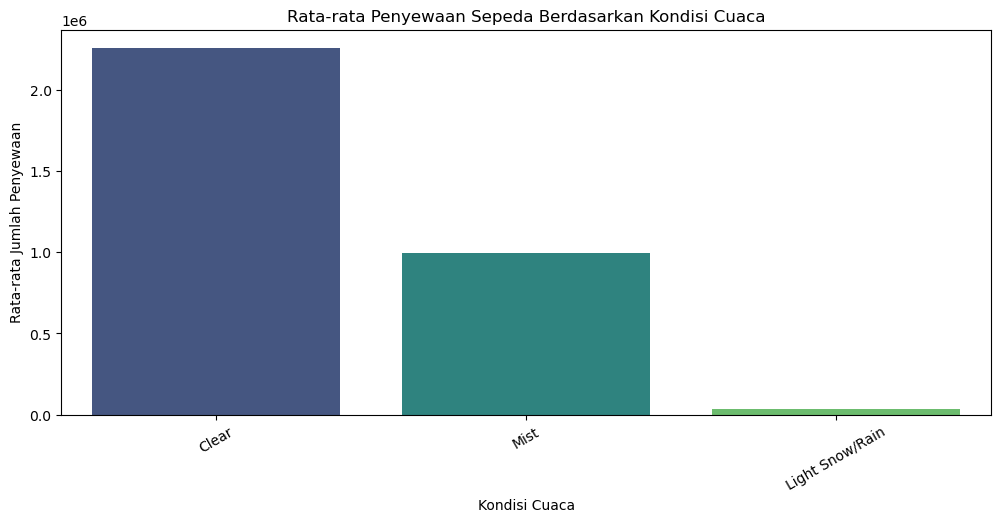

In [25]:
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_labels = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow/Rain"
}
season_counts = days_df.groupby("season")["count"].sum().rename(index=season_labels)
weather_counts = days_df.groupby("weather")["count"].sum().rename(index=weather_labels)

plt.figure(figsize=(10, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=30)
plt.show()

**Insight**
- Peminjaman sepeda tertinggi terjadi pada musim Fall dan saat kondisi cuaca Clear (Cerah, Few Clouds, Partly Cloudy). Ini menunjukkan bahwa pengguna cenderung lebih banyak menyewa sepeda saat cuaca cerah dan di musim gugur.
- Peminjaman sepeda terendah terjadi pada musim Spring (Musim Semi) dan saat kondisi cuaca Light Snow/Rain + Thunderstorm/Scattered Clouds. Hal ini bisa disebabkan oleh cuaca yang kurang mendukung seperti hujan ringan atau badai petir, yang membuat orang enggan bersepeda.

**Saran Bisnis**
- Meningkatkan ketersediaan sepeda di musim Fall & saat cuaca cerah → Karena permintaan tinggi, perusahaan bisa menambah jumlah sepeda di lokasi strategis untuk mengoptimalkan keuntungan.
- Promosi & diskon di musim Spring & saat cuaca buruk → Untuk meningkatkan jumlah pengguna di musim rendah, bisa diberikan diskon atau insentif bagi pelanggan yang tetap menggunakan layanan meskipun cuaca kurang mendukung.

### Pertanyaan 2: Pada hari apa penyewaan sepeda paling banyak?

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\2068978320.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = days_df.groupby("weekday")["count"].sum().rename(index=weekday_labels)
C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\2068978320.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="crest")


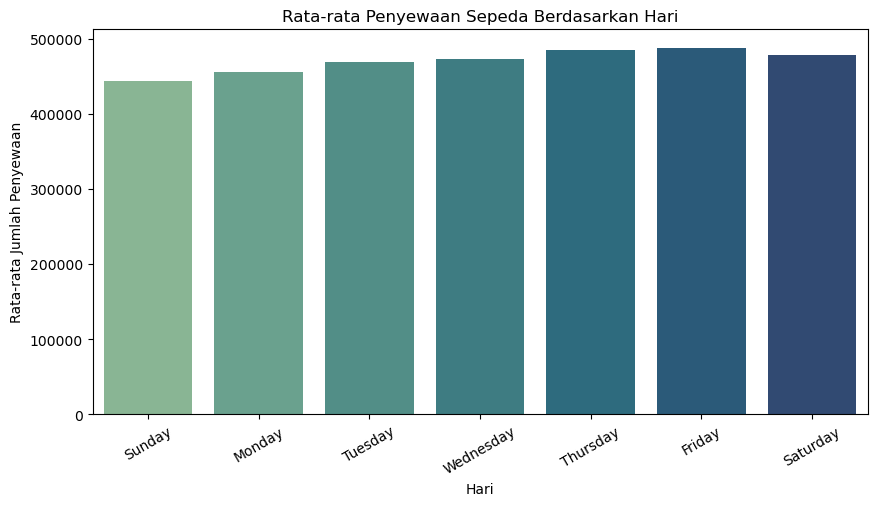

In [ ]:
weekday_labels = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

weekday_counts = days_df.groupby("weekday")["count"].sum().rename(index=weekday_labels)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="crest")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=30)
plt.show()

C:\Users\Rasen\AppData\Local\Temp\ipykernel_29596\2418005864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = days_df.groupby("workingday")["count"].sum().reset_index()


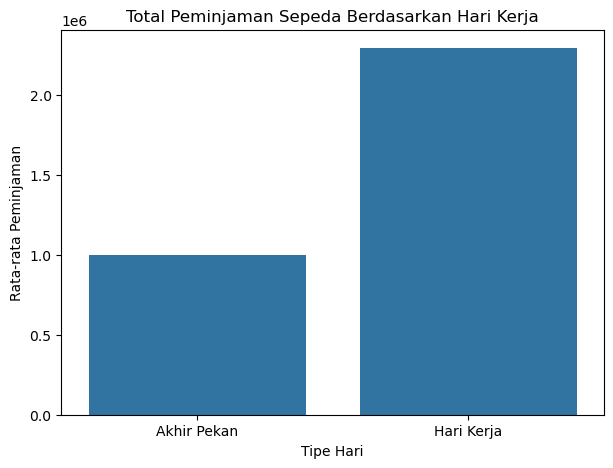

In [27]:
workingday_avg = days_df.groupby("workingday")["count"].sum().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=workingday_avg["workingday"], y=workingday_avg["count"])
plt.xticks([0, 1], ["Akhir Pekan", "Hari Kerja"])
plt.title("Total Peminjaman Sepeda Berdasarkan Hari Kerja")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

**Insight:**
- Hari dengan penyewaan tertinggi: Kamis dan Jumat → Kemungkinan karena aktivitas kerja atau sekolah mencapai puncaknya menjelang akhir pekan.
- Penyewaan lebih tinggi pada hari kerja (working day) → Menandakan bahwa sepeda banyak digunakan sebagai alat transportasi harian, bukan hanya untuk rekreasi.
- Penyewaan lebih rendah pada akhir pekan/libur → Bisa jadi karena orang lebih memilih kendaraan pribadi atau transportasi umum untuk bepergian.

**Saran Bisnis**
- Optimalkan jumlah sepeda di hari kerja, terutama di Kamis dan Jumat, agar pasokan cukup untuk memenuhi permintaan.
- Strategi promosi di akhir pekan: Misalnya, menawarkan paket sewa khusus untuk keluarga atau wisatawan agar meningkatkan penggunaan di hari libur.

In [28]:
days_df.to_csv("dashboard/main_data.csv", index=False)

## Analisis Lanjutan [Binning]

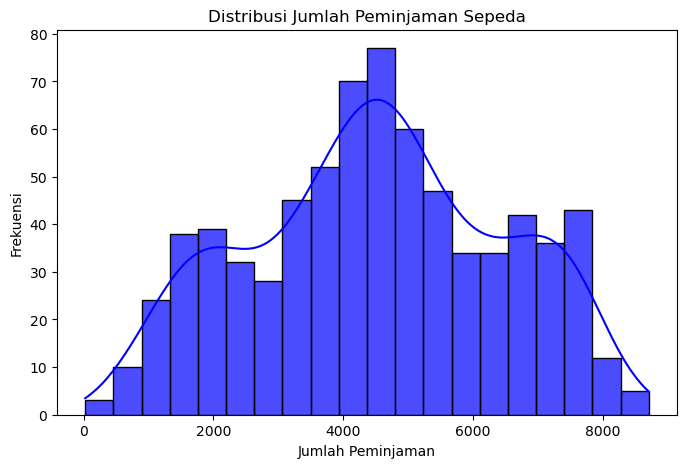

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(days_df['count'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan histogram terdapat 3 puncak yang kemungkinan dapat dikelompokkna menjadi 3 kelas dengan teknik binning

In [30]:
days_df['Kelas Jumlah Peminjaman'] = pd.qcut(
    days_df['count'], 
    q=3, 
    labels=['Sepi', 'Normal', 'Ramai']
)

In [31]:
days_df['Kelas Jumlah Peminjaman'].value_counts()

Kelas Jumlah Peminjaman
Sepi      244
Normal    244
Ramai     243
Name: count, dtype: int64

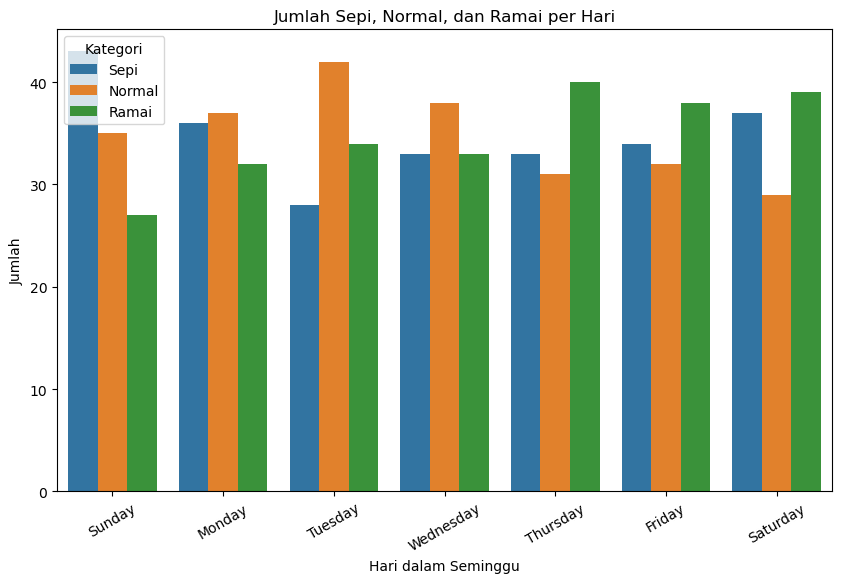

In [32]:
days_df["weekday"] = days_df["weekday"].astype(int).map(weekday_labels)
order_hari = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=days_df, x="weekday", hue="Kelas Jumlah Peminjaman", order=order_hari)

plt.title("Jumlah Sepi, Normal, dan Ramai per Hari")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah")
plt.xticks(rotation=30)
plt.legend(title="Kategori")

plt.show()

**Insight**
- Tingkat "Ramai" yang tinggi pada Kamis, Jumat, dan Sabtu menunjukkan peluang bisnis untuk meningkatkan kapasitas layanan atau penawaran khusus pada hari-hari tersebut.
- Hari Selasa dengan tingkat "Normal" tertinggi namun "Sepi" terendah bisa menjadi waktu strategis untuk aktivitas pemasaran atau promosi untuk meningkatkan jumlah pelanggan.

## Conclusion

**1️⃣ Bagaimana pola penyewaan sepeda berdasarkan musim dan cuaca?**
- Musim dengan penyewaan tertinggi: Fall (musim gugur) → Cuaca cenderung lebih nyaman dibandingkan musim lainnya.
- Musim dengan penyewaan terendah: Spring (musim semi) → Kemungkinan karena cuaca masih cenderung dingin dan kurang kondusif untuk bersepeda.
- Cuaca dengan penyewaan tertinggi: Clear (cerah / berawan ringan) → Kondisi yang ideal untuk bersepeda.
- Cuaca dengan penyewaan terendah: Light Snow / Light Rain → Cuaca ekstrem mengurangi minat pengguna untuk bersepeda.

__💡Kesimpulan: Musim dan cuaca berpengaruh signifikan terhadap penyewaan sepeda. Bisnis sewa sepeda bisa meningkatkan stok saat musim gugur dan menawarkan promo saat musim semi serta cuaca mendung.__

**2️⃣ Pada hari apa penyewaan sepeda paling banyak?**
- Hari dengan penyewaan tertinggi: Kamis & Jumat → Kemungkinan karena aktivitas kerja atau sekolah mencapai puncaknya menjelang akhir pekan.
- Hari dengan penyewaan terendah: Akhir pekan (Minggu) → Indikasi bahwa sepeda lebih sering digunakan sebagai transportasi sehari-hari, bukan hanya rekreasi.
- Sebagian besar penyewaan terjadi pada hari kerja (working day) dibandingkan hari libur.

__💡 Kesimpulan: Sepeda lebih sering digunakan untuk aktivitas harian dibandingkan rekreasi. Perlu strategi operasional yang fokus pada hari kerja, seperti peningkatan jumlah sepeda di hari sibuk dan penawaran khusus di akhir pekan untuk menarik lebih banyak pengguna.__